In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pc
#import geopandas


In [2]:
resp1 = requests.get('https://covid-tracker-us.herokuapp.com/deaths', headers={'accept':'application/json'}).json()
resp2 = requests.get('https://covid-tracker-us.herokuapp.com/recovered').json()
resp3 = requests.get('https://covid-tracker-us.herokuapp.com/confirmed').json()
resp4 = requests.get('https://covid-tracker-us.herokuapp.com/v2/locations').json()
resp5 = requests.get('https://covid-tracker-us.herokuapp.com/v2/latest').json()

df1 = pd.json_normalize(resp1['locations'])
df2 = pd.json_normalize(resp2['locations'])
df3 = pd.json_normalize(resp3['locations'])
df4 = pd.json_normalize(resp4['locations'])
df5 = pd.json_normalize(resp5['latest'])

#if resp.status_code != 200:


In [3]:
df5['total'] = df5['confirmed'] + df5['deaths'] + df5['recovered']
df5['confirmed_percentage'] = df5['confirmed'] * 100 / df5['total']
df5['deaths_percentage'] = df5['deaths'] * 100 / df5['total']
df5['recovered_percentage'] = df5['recovered'] * 100 / df5['total']

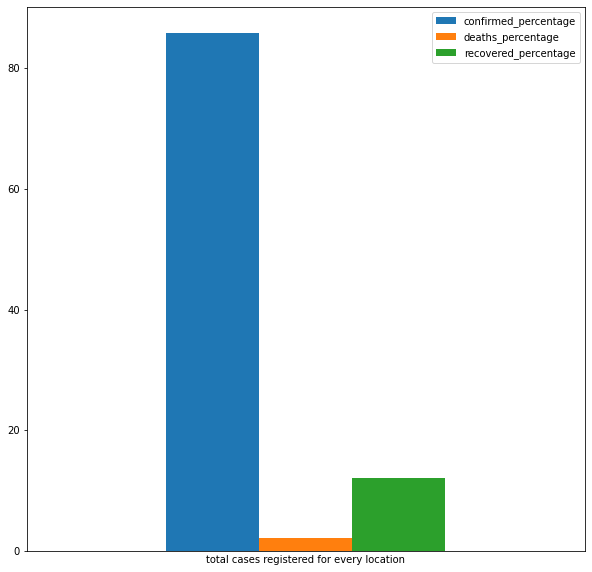

In [74]:
ax = df5[['confirmed_percentage','deaths_percentage','recovered_percentage']].plot.bar(rot=0, figsize=(10,10))
ax.set_xlabel("total cases registered for every location", fontsize=10)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

In [11]:
df.columns.tolist()

['country',
 'country_code',
 'province',
 'latest',
 'coordinates.lat',
 'coordinates.long',
 'history.1/22/20',
 'history.1/23/20',
 'history.1/24/20',
 'history.1/25/20',
 'history.1/26/20',
 'history.1/27/20',
 'history.1/28/20',
 'history.1/29/20',
 'history.1/30/20',
 'history.1/31/20',
 'history.2/1/20',
 'history.2/2/20',
 'history.2/3/20',
 'history.2/4/20',
 'history.2/5/20',
 'history.2/6/20',
 'history.2/7/20',
 'history.2/8/20',
 'history.2/9/20',
 'history.2/10/20',
 'history.2/11/20',
 'history.2/12/20',
 'history.2/13/20',
 'history.2/14/20',
 'history.2/15/20',
 'history.2/16/20',
 'history.2/17/20',
 'history.2/18/20',
 'history.2/19/20',
 'history.2/20/20',
 'history.2/21/20',
 'history.2/22/20',
 'history.2/23/20',
 'history.2/24/20',
 'history.2/25/20',
 'history.2/26/20',
 'history.2/27/20',
 'history.2/28/20',
 'history.2/29/20',
 'history.3/1/20',
 'history.3/2/20',
 'history.3/3/20',
 'history.3/4/20',
 'history.3/5/20',
 'history.3/6/20',
 'history.3/7/20',
 '

In [16]:
df.groupby(['country']).agg({'latest':'mean'})

,latest
country,
Afghanistan,35036.0
Albania,12667.0
Algeria,43779.0
Andorra,4675.0
Angola,6326.0
...,...
West Bank and Gaza,53367.0
Western Sahara,8.0
Yemen,1394.0


In [125]:
def country_to_continent(country_code):
    try:
        country_continent_code = pc.country_alpha2_to_continent_code(country_code)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return "Other"

    

In [126]:
df4['continent'] = df4['country_code'].apply(lambda x: country_to_continent(x))
df4

,id,country,country_code,country_population,province,last_updated,coordinates.latitude,coordinates.longitude,latest.confirmed,latest.deaths,latest.recovered,continent
0,0,Afghanistan,AF,37172386.0,,2020-11-15T18:04:08.409260Z,33.93911,67.709953,43035,1605,35067,Asia
1,1,Albania,AL,2866376.0,,2020-11-15T18:04:08.451594Z,41.1533,20.1683,27233,612,12767,Europe
2,2,Algeria,DZ,42228429.0,,2020-11-15T18:04:08.500388Z,28.0339,1.6596,66819,2139,44199,Africa
3,3,Andorra,AD,77006.0,,2020-11-15T18:04:08.560504Z,42.5063,1.5218,5725,75,4675,Europe
4,4,Angola,AO,30809762.0,,2020-11-15T18:04:08.673696Z,-11.2027,17.8739,13374,322,6345,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
264,264,West Bank and Gaza,PS,4569087.0,,2020-11-15T18:04:17.568002Z,31.9522,35.2332,62167,558,0,Asia
265,265,Western Sahara,EH,273008.0,,2020-11-15T18:04:17.590772Z,24.2155,-12.8858,10,1,0,Other
266,266,Yemen,YE,28498687.0,,2020-11-15T18:04:17.612276Z,15.552727,48.516388,2072,605,0,Asia
267,267,Zambia,ZM,17351822.0,,2020-11-15T18:04:17.633601Z,-13.133897,27.849332,17097,350,0,Africa


In [6]:
graph1 = df4.groupby(['continent']).agg({'latest.confirmed':'mean', 'latest.deaths':'mean','latest.recovered':'mean'})

In [7]:
temporary = graph1.reset_index()
latest_confirmed1 = temporary[['continent','latest.confirmed']]
latest_recovered1 = temporary[['continent','latest.recovered']]
latest_deaths1 = temporary[['continent','latest.deaths']]

latest_confirmed1 = latest_confirmed1.groupby(['continent']).mean()
latest_recovered1 = latest_recovered1.groupby(['continent']).mean()
latest_deaths1 = latest_deaths1.groupby(['continent']).mean()

Text(0.5, 5.75, 'continents')

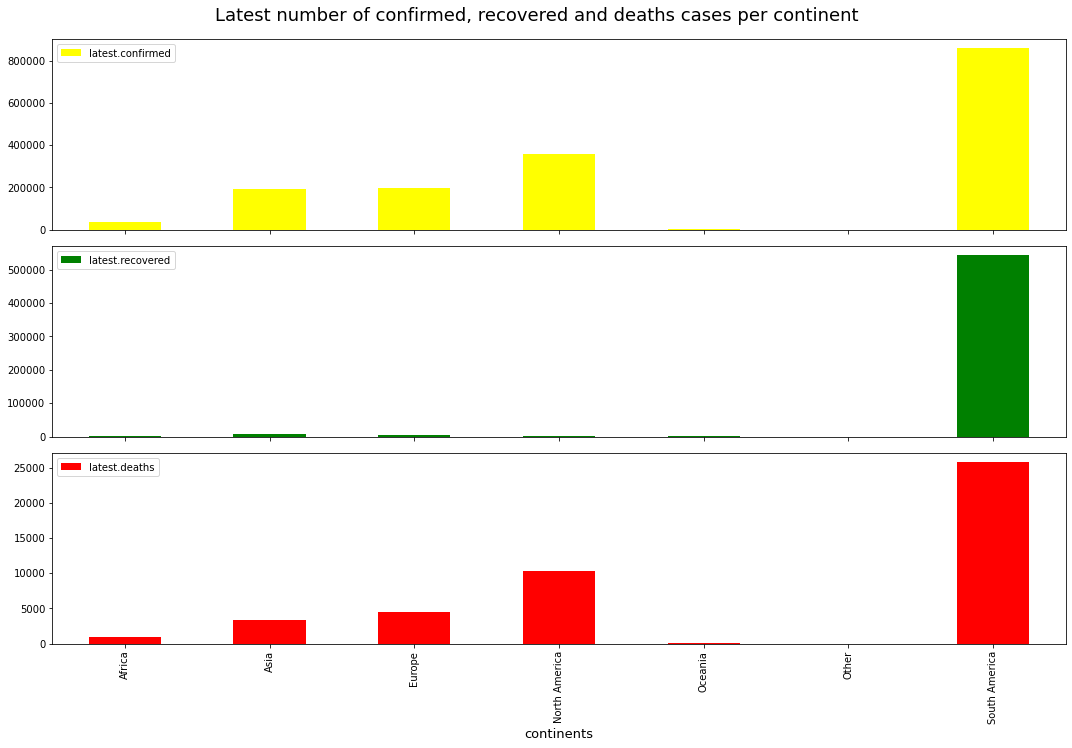

In [36]:
fig, axes = plt.subplots(3,1, figsize=(15,10))

latest_confirmed1.plot(kind='bar',ax=axes[0], color = "yellow")
latest_recovered1.plot(kind='bar',ax=axes[1], color = "green",sharex=axes[0], sharey=axes[0])
latest_deaths1.plot(kind='bar',ax=axes[2], color = "red", sharex=axes[0], sharey=axes[0])
fig.tight_layout()
fig.suptitle("Latest number of confirmed, recovered and deaths cases per continent",y='1.03', fontsize=18)
plt.xlabel("continents",fontsize=13)
#plt.close()

In [49]:
graph2 = df5

In [50]:
df4

,id,country,country_code,country_population,province,last_updated,coordinates.latitude,coordinates.longitude,latest.confirmed,latest.deaths,latest.recovered,continent
0,0,Afghanistan,AF,37172386.0,,2020-11-15T16:06:54.038217Z,33.93911,67.709953,43035,1605,35067,Asia
1,1,Albania,AL,2866376.0,,2020-11-15T16:06:54.087509Z,41.1533,20.1683,27233,612,12767,Europe
2,2,Algeria,DZ,42228429.0,,2020-11-15T16:06:54.133219Z,28.0339,1.6596,66819,2139,44199,Africa
3,3,Andorra,AD,77006.0,,2020-11-15T16:06:54.179429Z,42.5063,1.5218,5725,75,4675,Europe
4,4,Angola,AO,30809762.0,,2020-11-15T16:06:54.225740Z,-11.2027,17.8739,13374,322,6345,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
264,264,West Bank and Gaza,PS,4569087.0,,2020-11-15T16:07:03.643791Z,31.9522,35.2332,62167,558,0,Asia
265,265,Western Sahara,EH,273008.0,,2020-11-15T16:07:03.682553Z,24.2155,-12.8858,10,1,0,Other
266,266,Yemen,YE,28498687.0,,2020-11-15T16:07:03.719883Z,15.552727,48.516388,2072,605,0,Asia
267,267,Zambia,ZM,17351822.0,,2020-11-15T16:07:03.798420Z,-13.133897,27.849332,17097,350,0,Africa


In [21]:
graph2 = df4.loc[df4['continent'] == 'South America']
graph2

,id,country,country_code,country_population,province,last_updated,coordinates.latitude,coordinates.longitude,latest.confirmed,latest.deaths,latest.recovered,continent
6,6,Argentina,AR,44494502.0,,2020-11-15T18:04:08.767151Z,-38.4161,-63.6167,1304846,35307,1119366,South America
27,27,Bolivia,BO,11353142.0,,2020-11-15T18:04:09.854486Z,-16.2902,-63.5887,143181,8841,116828,South America
30,30,Brazil,BR,209469333.0,,2020-11-15T18:04:09.997136Z,-14.235,-51.9253,5848959,165658,5279452,South America
55,55,Chile,CL,18729160.0,,2020-11-15T18:04:10.973807Z,-35.6751,-71.543,529676,14777,0,South America
89,89,Colombia,CO,49648685.0,,2020-11-15T18:04:12.110756Z,4.5709,-74.2973,1191634,33829,0,South America
106,106,Ecuador,EC,17084357.0,,2020-11-15T18:04:12.673513Z,-1.8312,-78.1834,179627,12997,0,South America
137,137,Guyana,GY,779004.0,,2020-11-15T18:04:14.058745Z,4.860416,-58.93018,4794,138,0,South America
202,202,Paraguay,PY,6956071.0,,2020-11-15T18:04:16.182577Z,-23.4425,-58.4438,71065,1569,0,South America
203,203,Peru,PE,31989256.0,,2020-11-15T18:04:16.211121Z,-9.19,-75.0152,932650,35106,0,South America
231,231,Suriname,SR,575991.0,,2020-11-15T18:04:16.857074Z,3.9193,-56.0278,5274,114,0,South America


Text(0.5, 27.625, 'Country')

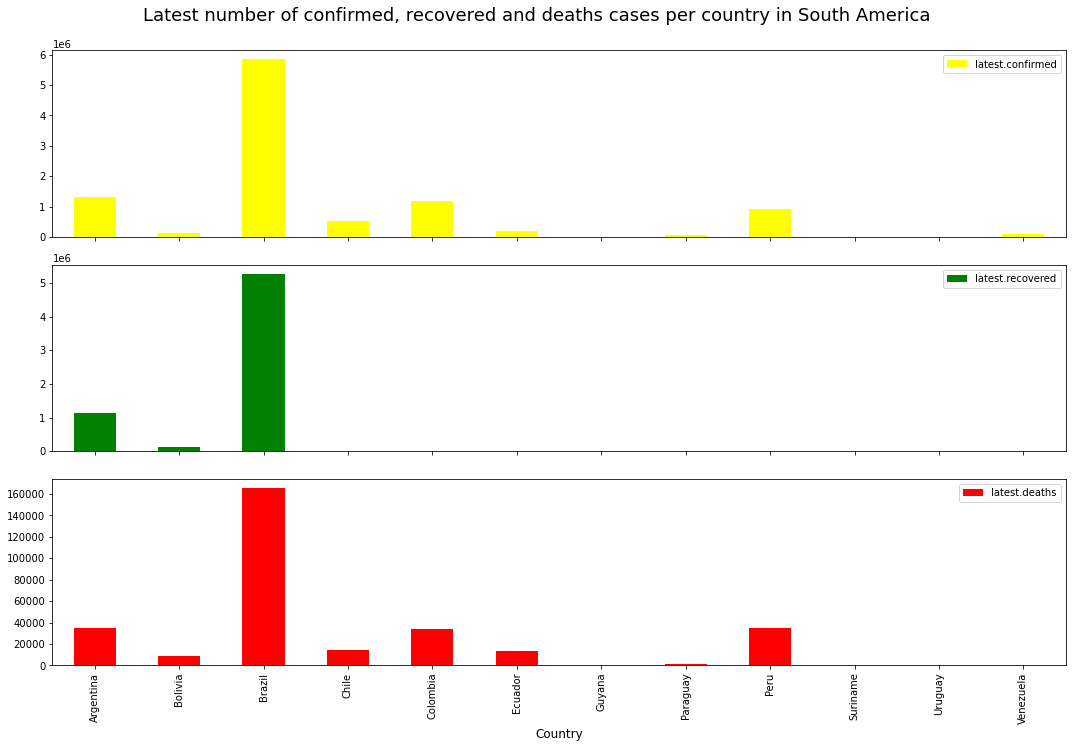

In [193]:
#plt.close()

graph2_confirmed = graph2[['country','latest.confirmed']]
graph2_deaths = graph2[['country','latest.deaths']]
graph2_recovered = graph2[['country','latest.recovered']]

graph2_confirmed = graph2_confirmed.groupby(['country']).mean()
graph2_recovered = graph2_recovered.groupby(['country']).mean()
graph2_deaths = graph2_deaths.groupby(['country']).mean()

fig, axes = plt.subplots(3,1, figsize=(15,10))
graph2_confirmed.plot(kind='bar',ax=axes[0], color = "yellow")
graph2_recovered.plot(kind='bar',ax=axes[1], color = "green",sharex=axes[0], sharey=axes[0])
graph2_deaths.plot(kind='bar',ax=axes[2], color = "red", sharex=axes[0], sharey=axes[0])
fig.tight_layout()
fig.suptitle("Latest number of confirmed, recovered and deaths cases per country in South America",y='1.03', fontsize=18)
plt.xlabel("Country",fontsize=12)

In [29]:
graph2_confirmed.groupby['country'].mean()
graph2_deaths.groupby['country'].mean()
graph2_recovered.groupby['country'].mean()

,country,latest.confirmed
6,Argentina,1304846
27,Bolivia,143181
30,Brazil,5848959
55,Chile,529676
89,Colombia,1191634
106,Ecuador,179627
137,Guyana,4794
202,Paraguay,71065
203,Peru,932650
231,Suriname,5274


In [39]:
graph2_recovered

,latest.recovered
country,
Argentina,1119366
Bolivia,116828
Brazil,5279452
Chile,0
Colombia,0
Ecuador,0
Guyana,0
Paraguay,0
Peru,0


In [43]:
graph2

,id,country,country_code,country_population,province,last_updated,coordinates.latitude,coordinates.longitude,latest.confirmed,latest.deaths,latest.recovered,continent
6,6,Argentina,AR,44494502.0,,2020-11-15T18:04:08.767151Z,-38.4161,-63.6167,1304846,35307,1119366,South America
27,27,Bolivia,BO,11353142.0,,2020-11-15T18:04:09.854486Z,-16.2902,-63.5887,143181,8841,116828,South America
30,30,Brazil,BR,209469333.0,,2020-11-15T18:04:09.997136Z,-14.235,-51.9253,5848959,165658,5279452,South America
55,55,Chile,CL,18729160.0,,2020-11-15T18:04:10.973807Z,-35.6751,-71.543,529676,14777,0,South America
89,89,Colombia,CO,49648685.0,,2020-11-15T18:04:12.110756Z,4.5709,-74.2973,1191634,33829,0,South America
106,106,Ecuador,EC,17084357.0,,2020-11-15T18:04:12.673513Z,-1.8312,-78.1834,179627,12997,0,South America
137,137,Guyana,GY,779004.0,,2020-11-15T18:04:14.058745Z,4.860416,-58.93018,4794,138,0,South America
202,202,Paraguay,PY,6956071.0,,2020-11-15T18:04:16.182577Z,-23.4425,-58.4438,71065,1569,0,South America
203,203,Peru,PE,31989256.0,,2020-11-15T18:04:16.211121Z,-9.19,-75.0152,932650,35106,0,South America
231,231,Suriname,SR,575991.0,,2020-11-15T18:04:16.857074Z,3.9193,-56.0278,5274,114,0,South America


In [58]:
df5.unstack().index

MultiIndex([(           'confirmed', 0),
            (              'deaths', 0),
            (           'recovered', 0),
            (               'total', 0),
            ('confirmed_percentage', 0),
            (   'deaths_percentage', 0),
            ('recovered_percentage', 0)],
           )

Text(0, 0.5, 'Number of cases')

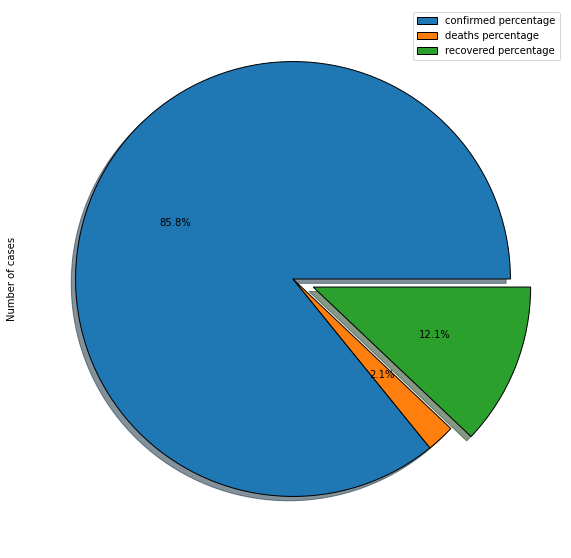

In [103]:

list_of_percentages = [df5['confirmed_percentage'].values[0],df5['deaths_percentage'].values[0], df5['recovered_percentage'].values[0]]
list_of_percentages
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
plt.pie(list_of_percentages, wedgeprops={'edgecolor' :'black'}, explode=explode, shadow=True, autopct='%1.1f%%')
plt.legend(['confirmed percentage','deaths percentage','recovered percentage'])
plt.ylabel('Number of cases')

In [55]:
df5.index

RangeIndex(start=0, stop=1, step=1)

In [60]:
graph0_1.reset_index()

,level_0,level_1,0
0,confirmed_percentage,0,85.842839
1,deaths_percentage,0,2.087194
2,recovered_percentage,0,12.069967


In [99]:
list_of_percentages = [df5['confirmed_percentage'].values[0],df5['deaths_percentage'].values[0], df5['recovered_percentage'].values[0]]
list_of_percentages

[85.84283867763543, 2.0871940503782187, 12.069967271986348]

In [144]:
deaths_per_continent = df1
deaths_per_continent['continent'] = deaths_per_continent['country_code'].apply(lambda x: country_to_continent(x))
deaths_per_continent = deaths_per_continent.groupby(['continent']).mean()
deaths_per_continent.drop('latest',axis=1, inplace=True)

Text(0.5, 1.02, 'Number of deaths per continent throughout the days')

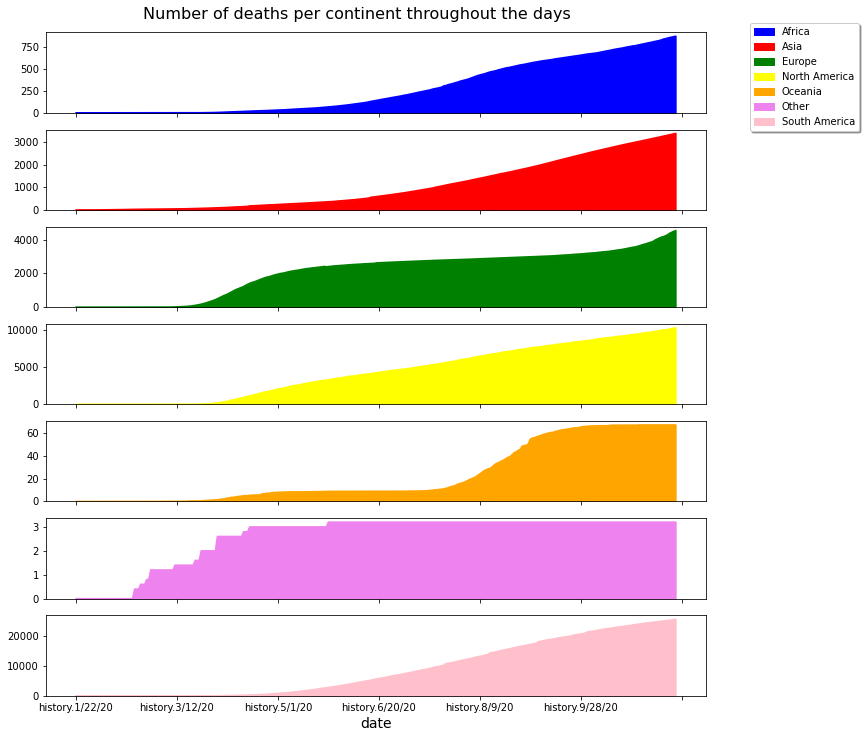

In [194]:
fig, ax = plt.subplots(7,1, figsize = (10,10))
i=0
for (continent, row),color in zip(deaths_per_continent.iterrows(),['blue','red','green','yellow','orange', 'violet', 'pink']):
        row.plot(kind='area', ax=ax[i], sharex=True, label = continent, color = color)
        i+=1
ax[i-1].set_xlabel("date", fontsize=14)
fig.legend(bbox_to_anchor=(1.2, 1.0), shadow=True)
fig.tight_layout()
fig.suptitle("Number of deaths per continent throughout the days", fontsize=16, y=1.02)


Text(0.5, 1.02, 'Number of recovered cases per continent throughout the days')

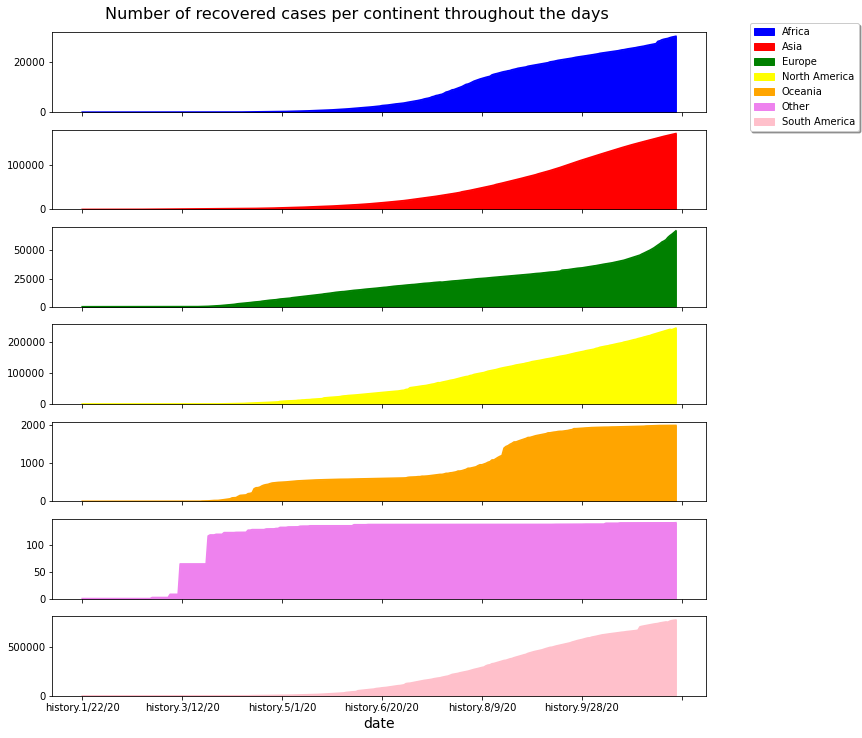

In [201]:
recovered_per_continent = df2
recovered_per_continent['continent'] = recovered_per_continent['country_code'].apply(lambda x: country_to_continent(x))
recovered_per_continent = recovered_per_continent.groupby(['continent']).mean()
recovered_per_continent.drop('latest',axis=1, inplace=True)
fig, ax = plt.subplots(7,1, figsize = (10,10))
i=0
for (continent, row),color in zip(recovered_per_continent.iterrows(),['blue','red','green','yellow','orange', 'violet', 'pink']):
        row.plot(kind='area', ax=ax[i], sharex=True, label = continent, color = color)
        i+=1
ax[i-1].set_xlabel("date", fontsize=14)
fig.legend(bbox_to_anchor=(1.2, 1.0), shadow=True)
fig.tight_layout()
fig.suptitle("Number of recovered cases per continent throughout the days", fontsize=16, y=1.02)

Text(0.5, 1.02, 'Number of confirmed cases per continent throughout the days')

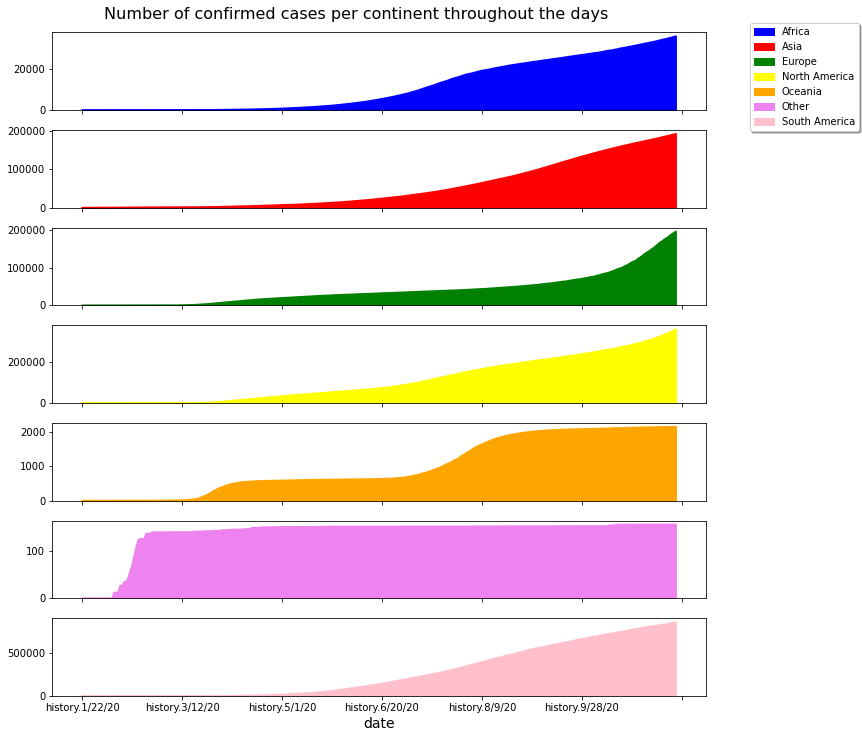

In [200]:
confirmed_per_continent = df3
confirmed_per_continent['continent'] = confirmed_per_continent['country_code'].apply(lambda x: country_to_continent(x))
confirmed_per_continent = confirmed_per_continent.groupby(['continent']).mean()
confirmed_per_continent.drop('latest',axis=1, inplace=True)
fig, ax = plt.subplots(7,1, figsize = (10,10))
i=0
for (continent, row),color in zip(confirmed_per_continent.iterrows(),['blue','red','green','yellow','orange', 'violet', 'pink']):
        row.plot(kind='area', ax=ax[i], sharex=True, label = continent, color = color)
        i+=1
ax[i-1].set_xlabel("date", fontsize=14)
fig.legend(bbox_to_anchor=(1.2, 1.0), shadow=True)
fig.tight_layout()
fig.suptitle("Number of confirmed cases per continent throughout the days", fontsize=16, y=1.02)

In [219]:
deaths = df1.nlargest(5,'latest')
recovered = df2.nlargest(5,'latest')
confirmed = df3.nlargest(5,'latest')

Text(0.5, 1.02, 'Number of deaths cases throughout the days in the countries with the most deaths cases')

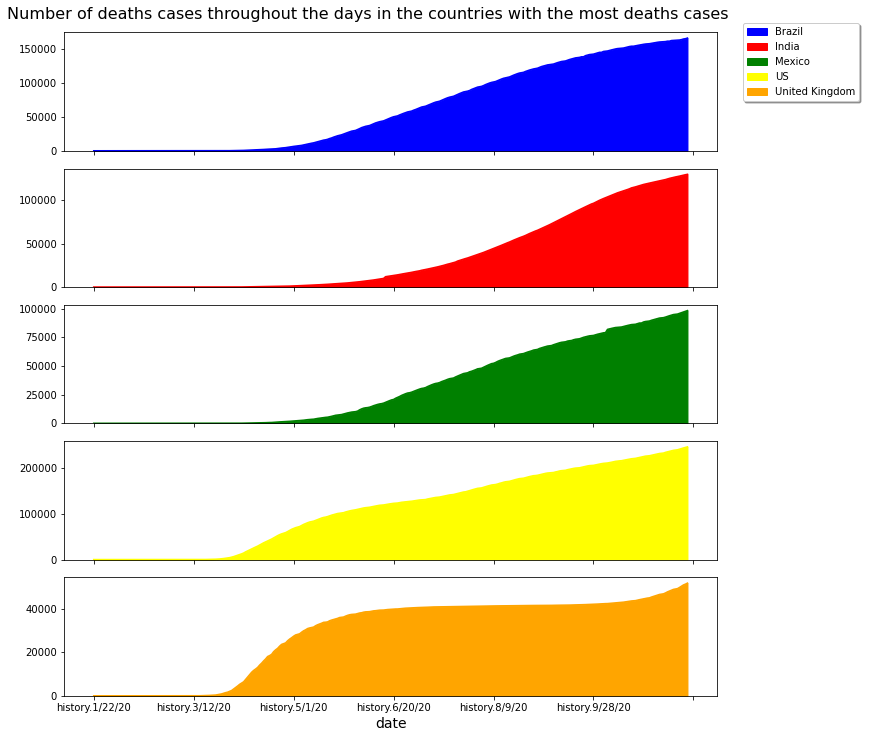

In [222]:
deaths = deaths.groupby(['country']).mean()
deaths.drop('latest',axis=1, inplace=True)
fig, ax = plt.subplots(5,1, figsize = (10,10))
i=0
for (continent, row),color in zip(deaths.iterrows(),['blue','red','green','yellow','orange']):
        row.plot(kind='area', ax=ax[i], sharex=True, label = continent, color = color)
        i+=1
ax[i-1].set_xlabel("date", fontsize=14)
fig.legend(bbox_to_anchor=(1.2, 1.0), shadow=True)
fig.tight_layout()
fig.suptitle("Number of deaths cases throughout the days in the countries with the most deaths cases", fontsize=16, y=1.02)

Text(0.5, 1.02, 'Number of recovered cases throughout the days in the countries with the most recovered cases')

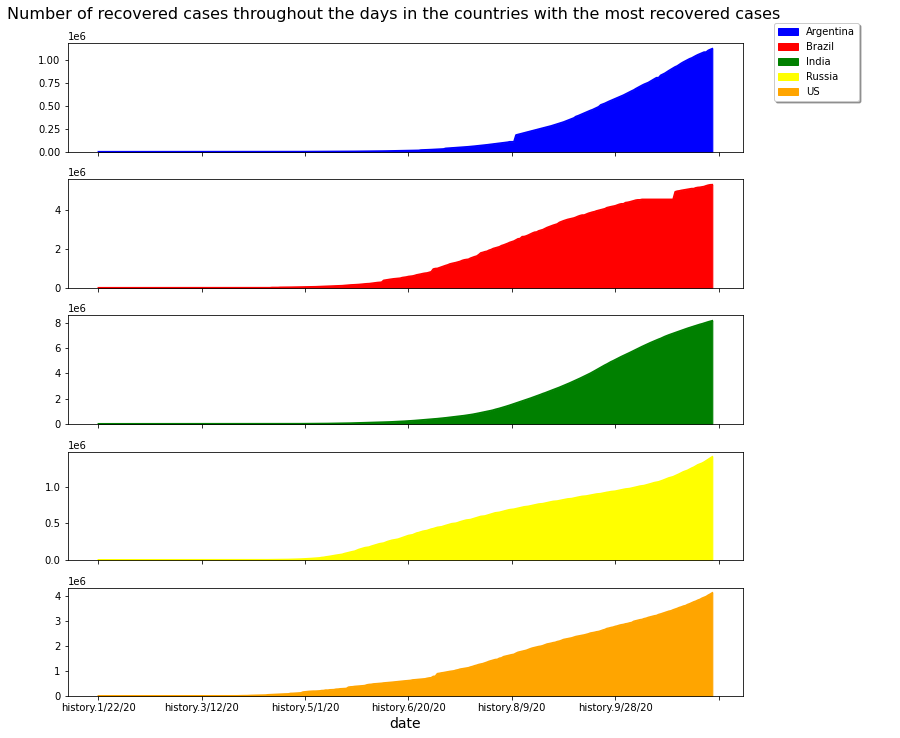

In [220]:
recovered = recovered.groupby(['country']).mean()
recovered.drop('latest',axis=1, inplace=True)
fig, ax = plt.subplots(5,1, figsize = (10,10))
i=0
for (continent, row),color in zip(recovered.iterrows(),['blue','red','green','yellow','orange']):
        row.plot(kind='area', ax=ax[i], sharex=True, label = continent, color = color)
        i+=1
ax[i-1].set_xlabel("date", fontsize=14)
fig.legend(bbox_to_anchor=(1.2, 1.0), shadow=True)
fig.tight_layout()
fig.suptitle("Number of recovered cases throughout the days in the countries with the most recovered cases", fontsize=16, y=1.02)

Text(0.5, 1.02, 'Number of confirmed cases throughout the days in the countries with the most confirmed cases')

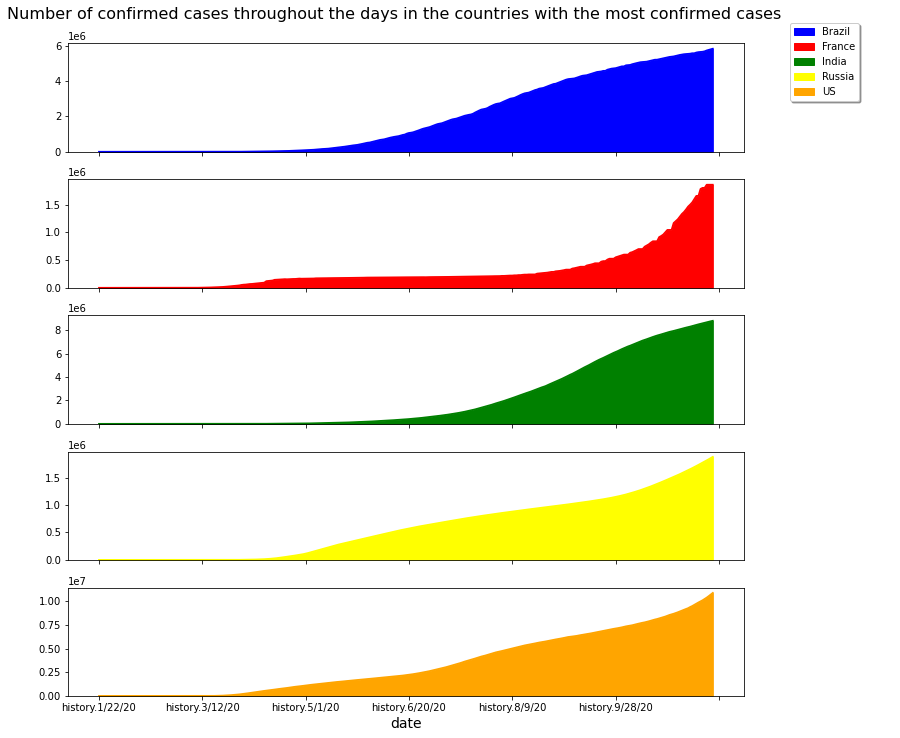

In [221]:
confirmed = confirmed.groupby(['country']).mean()
confirmed.drop('latest',axis=1, inplace=True)
fig, ax = plt.subplots(5,1, figsize = (10,10))
i=0
for (continent, row),color in zip(confirmed.iterrows(),['blue','red','green','yellow','orange']):
        row.plot(kind='area', ax=ax[i], sharex=True, label = continent, color = color)
        i+=1
ax[i-1].set_xlabel("date", fontsize=14)
fig.legend(bbox_to_anchor=(1.2, 1.0), shadow=True)
fig.tight_layout()
fig.suptitle("Number of confirmed cases throughout the days in the countries with the most confirmed cases", fontsize=16, y=1.02)

In [223]:
df5

,confirmed,deaths,recovered,total,confirmed_percentage,deaths_percentage,recovered_percentage
0,53927158,1311192,7582450,62820800,85.842839,2.087194,12.069967
